## Introducere spaCy

In [ ]:
! pip install -U spacy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.1/29.1 MB 49.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 78.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.5/19.5 MB 62.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 86.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: blis
    Found existing installation: blis 0.7.11
    Uninstalling blis-0.7.11:
      Successfully uninstalled blis-0.7.11
  Attempting uninstall: thinc
    Found existing installation: thinc 8.2.5
    Uninstalling thinc-8.2.5:
      Successfully uninstalled thinc-8.2.5
  Attempting uninstall: spacy
    Found existing installation: spacy 3.7.5
    Uninstalling spacy-3.7.5:
      Successfully uninstalled spacy-3.7.5
ERROR: pip's d

In [ ]:
# descarcam un model pre-antrenat

! python -m spacy download en_core_web_sm

In [ ]:
import spacy

# cu ajutorul acestei variabile vom procesa textele

NLP = spacy.load('en_core_web_sm')

In [ ]:
type(NLP)

spacy.lang.en.English

In [ ]:
text = "Ion Popescu and I started studying at the University of Bucharest in 2020. We were very happy about that."

In [ ]:
doc = NLP(text)

In [ ]:
type(doc)

spacy.tokens.doc.Doc

In [ ]:
token = doc[13]
print(type(token))
print(token)

<class 'spacy.tokens.token.Token'>
.


In [ ]:
print([token.text for token in doc])

['Ion', 'Popescu', 'and', 'I', 'started', 'studying', 'at', 'the', 'University', 'of', 'Bucharest', 'in', '2020', '.', 'We', 'were', 'very', 'happy', 'about', 'that', '.']


### Named Entity Recognition (NER) + noun chunks


spaCy recunoaste cateva tipuri de entitati cu nume:

- PERSON: numele oamenilor ("John Doe")
- ORG: organizatii ("Google")
- GPE: entitati geopolitice ("France")
- DATE: date sau perioade ("January 2021")
- MONEY: valori monetare ("$10,000")

In [ ]:
print(doc.ents)
print(type(doc.ents))
print(type(doc.ents[0]))

(the University of Bucharest, 2020)
<class 'tuple'>
<class 'spacy.tokens.span.Span'>


In [ ]:
for entity in doc.ents:
    print(entity, ' ', entity.label_)

the University of Bucharest   ORG
2020   DATE


In [ ]:
spacy.displacy.render(doc, style="ent")

In [ ]:
list(doc.noun_chunks)

[Ion Popescu, I, the University, Bucharest, We, that]

In [ ]:
nc = list(doc.noun_chunks)
chunk = nc[2]
print(chunk)

the University


In [ ]:
type(chunk)

spacy.tokens.span.Span

In [ ]:
type(doc[2:8])

spacy.tokens.span.Span

In [ ]:
print(chunk.start_char, chunk.end_char)
print(chunk.start, chunk.end)

38 52
7 9


In [ ]:
doc.text[chunk.start_char:chunk.end_char] # character offset!

'the University'

In [ ]:
doc[chunk.start : chunk.end] # pozitii numarate ca tokeni, al cata-lea cuvant e?

the University

### Part of speech tags (POS)



spaCy atribuie fiecarui cuvant 2 taguri: unul simplu (atributul POS) si unul mai detaliat (atributul TAG)
- lista completa si explicatii pentru POS [aici](//universaldependencies.org/u/pos/)
- lista completa si exemple pentru TAG mai jos

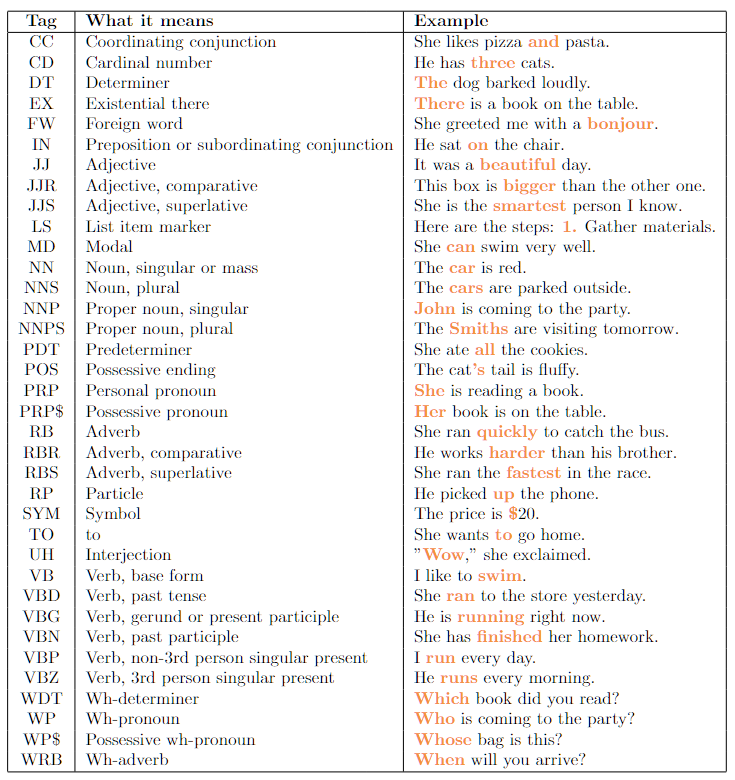

In [ ]:
token = doc[4]
print(token)
print(token.pos_)
print(token.tag_)

started
VERB
VBD


In [ ]:
token.is_punct, token.is_stop, token.is_alpha

(False, False, True)

In [ ]:
token = doc[2]
print(token)
print(token.pos_)
print(token.tag_)

and
CCONJ
CC


In [ ]:
spacy.explain("CCONJ")

'coordinating conjunction'

In [ ]:
token.is_punct, token.is_stop, token.is_alpha

(False, True, True)

🛑 lista completa de stop-words din spaCy se gaseste [aici](//github.com/explosion/spaCy/blob/master/spacy/lang/en/stop_words.py)

In [ ]:
for token in doc:
  if token.pos_ == 'VERB':
    print(token, token.lemma_)

started start
studying study


### Dependency parsing

In [ ]:
list(doc.sents)

[Ion Popescu and I started studying at the University of Bucharest in 2020.,
 We were very happy about that.]

In [ ]:
spacy.displacy.render(list(doc.sents)[1], style="dep")

In [ ]:
token.dep_

'punct'

In [ ]:
spacy.explain("acomp")

'adjectival complement'

##Federalist Papers: Authorship identification/Stylometry

### Download data

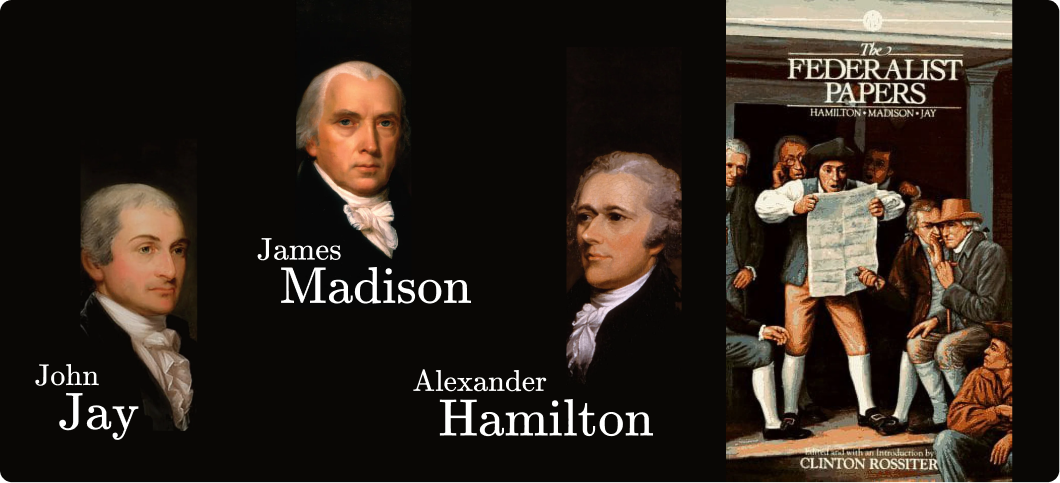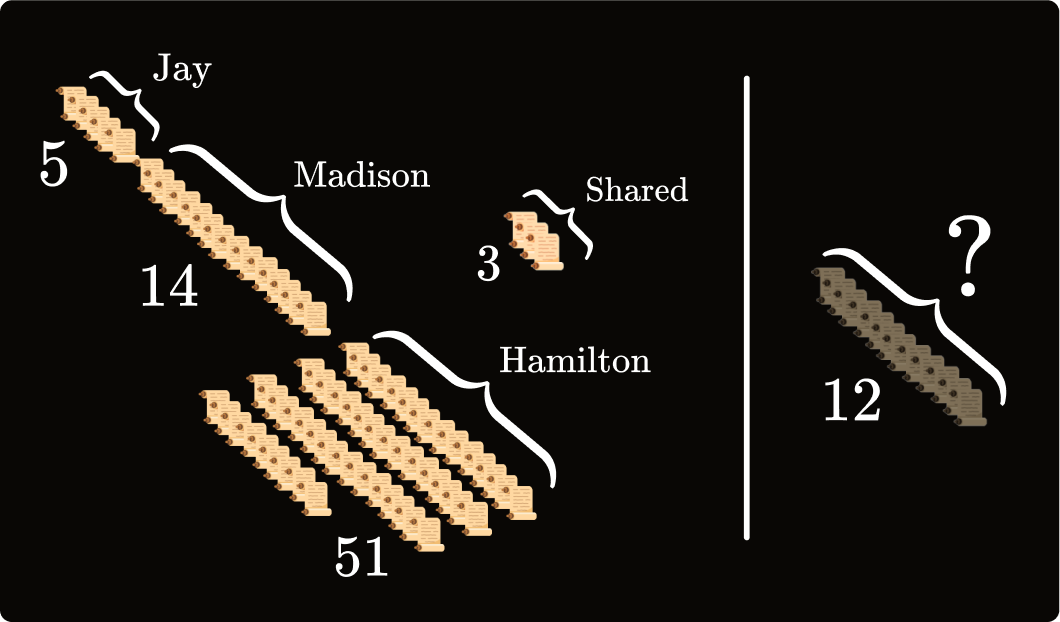

In [ ]:
! rm -rf stylometry-federalist*
! wget https://programminghistorian.org/assets/introduction-to-stylometry-with-python/stylometry-federalist.zip

--2024-10-31 17:25:43--  https://programminghistorian.org/assets/introduction-to-stylometry-with-python/stylometry-federalist.zip
Resolving programminghistorian.org (programminghistorian.org)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to programminghistorian.org (programminghistorian.org)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 881447 (861K) [application/zip]
Saving to: ‘stylometry-federalist.zip’

stylometry-federali 100%[===================>] 860.79K  --.-KB/s    in 0.06s   

2024-10-31 17:25:43 (14.7 MB/s) - ‘stylometry-federalist.zip’ saved [881447/881447]



In [ ]:
! unzip stylometry-federalist.zip

Archive:  stylometry-federalist.zip
   creating: data/
  inflating: data/federalist_55.txt  
  inflating: data/federalist_41.txt  
  inflating: data/federalist_69.txt  
  inflating: data/federalist_82.txt  
  inflating: data/federalist_83.txt  
  inflating: data/federalist_68.txt  
  inflating: data/federalist_40.txt  
  inflating: data/federalist_54.txt  
  inflating: data/federalist_42.txt  
  inflating: data/federalist_56.txt  
  inflating: data/federalist_81.txt  
  inflating: data/federalist_80.txt  
  inflating: data/federalist_57.txt  
  inflating: data/federalist_43.txt  
  inflating: data/federalist.txt     
  inflating: data/federalist_47.txt  
  inflating: data/federalist_53.txt  
  inflating: data/federalist_84.txt  
  inflating: data/federalist_85.txt  
  inflating: data/federalist_52.txt  
  inflating: data/federalist_46.txt  
  inflating: data/federalist_78.txt  
  inflating: data/federalist_50.txt  
  inflating: data/federalist_44.txt  
  inflating: data/federalist_45.t

In [ ]:
! ls data

federalist_10.txt  federalist_27.txt  federalist_43.txt  federalist_5.txt   federalist_76.txt
federalist_11.txt  federalist_28.txt  federalist_44.txt  federalist_60.txt  federalist_77.txt
federalist_12.txt  federalist_29.txt  federalist_45.txt  federalist_61.txt  federalist_78.txt
federalist_13.txt  federalist_2.txt   federalist_46.txt  federalist_62.txt  federalist_79.txt
federalist_14.txt  federalist_30.txt  federalist_47.txt  federalist_63.txt  federalist_7.txt
federalist_15.txt  federalist_31.txt  federalist_48.txt  federalist_64.txt  federalist_80.txt
federalist_16.txt  federalist_32.txt  federalist_49.txt  federalist_65.txt  federalist_81.txt
federalist_17.txt  federalist_33.txt  federalist_4.txt	 federalist_66.txt  federalist_82.txt
federalist_18.txt  federalist_34.txt  federalist_50.txt  federalist_67.txt  federalist_83.txt
federalist_19.txt  federalist_35.txt  federalist_51.txt  federalist_68.txt  federalist_84.txt
federalist_1.txt   federalist_36.txt  federalist_52.txt  feder

In [ ]:
papers = {
    'Madison': [10, 14, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48],
    'Hamilton': [1, 6, 7, 8, 9, 11, 12, 13, 15, 16, 17, 21, 22, 23, 24,
                 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 59, 60,
                 61, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77,
                 78, 79, 80, 81, 82, 83, 84, 85],
    'Jay': [2, 3, 4, 5],
    'Shared': [18, 19, 20],
    'Disputed': [49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 62, 63],
    'TestCase': [64]
}

In [ ]:
## o functie care compileaza toate fisierele asociate cu un autor intr-un sir de caractere
def read_files_into_string(filenames):
    strings = []
    for filename in filenames:
        with open(f'data/federalist_{filename}.txt', 'r') as f:
            strings.append(f.read())
    return '\n'.join(strings)

In [ ]:
authors = ('Madison', 'Hamilton', 'Jay', 'Disputed', 'Shared')
federalist_by_author = {}
for author, files in papers.items():
    federalist_by_author[author] = read_files_into_string(files)

In [ ]:
federalist_by_author.keys()

dict_keys(['Madison', 'Hamilton', 'Jay', 'Shared', 'Disputed', 'TestCase'])

In [ ]:
madisons_writings = federalist_by_author['Madison']
print(madisons_writings[:100])

 10

The Same Subject Continued (The Union as a Safeguard Against Domestic
Faction and Insurrection)


In [ ]:
madison = NLP(madisons_writings)

In [ ]:
madison[:10]

 10

The Same Subject Continued (The Union

In [ ]:
print(type(madison.sents)) # note that the "sents" property is of type generator. This is beyond the scope of the lab, but
# it is worth noting that performing index operations on a generator will cause an error.
try:
    # Attempting to slice a generator
    first_sentences = madison.sents[10]
except TypeError as e:
    # Generator objects do NOT hold all items at once in memory, but instead load one item at a time, so we cannot index them.
    print("An exception occurred:", e)

<class 'generator'>
An exception occurred: 'generator' object is not subscriptable


In [ ]:
for sentence in madison.sents:
    print(sentence)

 10

The Same Subject Continued (The Union as a Safeguard Against Domestic
Faction and Insurrection)

From the Daily Advertiser.
Thursday, November 22, 1787.


MADISON

To the People of the State of New York:

AMONG the numerous advantages promised by a well constructed Union, none
deserves to be more accurately developed than its tendency to break and
control the violence of faction.
The friend of popular governments never
finds himself so much alarmed for their character and fate, as when he
contemplates their propensity to this dangerous vice.
He will not fail,
therefore, to set a due value on any plan which, without violating the
principles to which he is attached, provides a proper cure for it.

The instability, injustice, and confusion introduced into the public
councils, have, in truth, been the mortal diseases under which popular
governments have everywhere perished; as they continue to be the
favorite and fruitful topics from which the adversaries to liberty
derive their most 

### Exercitiu 1: Curbele lui Mendenhall (1887)

In [ ]:
# You could run this code cell as well.
# This method is here to help you plot the graph at the end of exercise 1.
# The `plotly` library makes nice, interactive graphs

!pip install plotly
import plotly.graph_objects as go

def plot_word_length_distributions(word_length_distributions_by_author):
    for author, length_distribution in word_length_distributions_by_author.items():
        lengths = sorted(length_distribution.keys())
        counts = [length_distribution[length] for length in lengths]  # Corresponding word counts

        fig = go.Figure()
        fig.add_trace(go.Scatter(x=lengths, y=counts, mode='lines+markers', name=author))
        fig.update_layout(
            title=f"Word Length Distribution for {author}",
            xaxis_title="Word Length",
            yaxis_title="Word Count",
            xaxis=dict(
                tickmode='linear',  # Use linear tick mode
                tick0=1,            # Start at 1
                dtick=1             # Show every tick (step size of 1)
            )
        )

        fig.show()

In some instances, also,
those of the existing government act immediately on individuals.
In
cases of capture; of piracy; of the post office; of coins, weights, and
measures; of trade with the Indians; of claims under grants of land
by different States; and, above all, in the case of trials by
courts-marshal in the army and navy, by which death may be inflicted
without the intervention of a jury, or even of a civil magistrate; in
all these cases the powers of the Confederation operate immediately on
the persons and interests of individual citizens.
Do these fundamental
principles require, particularly, that no tax should be levied without
the intermediate agency of the States?
The Confederation itself
authorizes a direct tax, to a certain extent, on the post office.
The
power of coinage has been so construed by Congress as to levy a tribute
immediately from that source also.
But pretermitting these instances,
was it not an acknowledged object of the convention and the universal
expecta

O metoda simpla pentru stilometrie este sa ne uitam la lungimea cuvintelor folosite de fiecare autor.

Primul pas este sa segmentam textul in cuvinte. Pentru asta vom tokeniza textul folosind spacy si vom pastra doar tokenii ce reprezinta cuvinte (hint: putem folosi metoda `is_alpha` din python pentru asta).

In [ ]:
# Compute word length distribution for each author


def get_alphanumeric_words_by_author(authors_list, authors_corpus_list):
    federalist_by_author_words = {}

    for author in authors_list:
        all_works_by_author = authors_corpus_list[author]
        current_author_doc = NLP(all_works_by_author)
        current_author_words = [token for token in current_author_doc if token.is_alpha]  # Filter out punctuation

        federalist_by_author_words[author] = current_author_words

    return federalist_by_author_words

processed_words_by_author = get_alphanumeric_words_by_author(authors, federalist_by_author)

Urmatorul pas este sa numaram cate cuvinte de diferite lungimi a folosite fiecare autor

In [ ]:
def get_word_length_distributions_by_author(authors_list, authors_words_list):
    federalist_by_author_length_distributions = {}

    for author in authors_list:
        current_authors_words_list = authors_words_list[author]
        word_lengths = [len(word) for word in current_authors_words_list]

        federalist_by_author_length_distributions[author] = {}

        for word_length in word_lengths:
            if word_length not in federalist_by_author_length_distributions[author]:
                federalist_by_author_length_distributions[author][word_length] = 1
            else:
                federalist_by_author_length_distributions[author][word_length] += 1

    return federalist_by_author_length_distributions

word_length_distributions_by_author = get_word_length_distributions_by_author(authors, processed_words_by_author)

In [ ]:
# Run this cell to plot the word length distribution graph for each author. What do you see?
plot_word_length_distributions(word_length_distributions_by_author)

### Exercițiu 2: Statistica Hi-pătrat, Kilgariff (2001)
Statistica Hi-patrat este un scor prin care putem masura distanta/diferenta dintre 2 vocabulare. Un scor Hi-patrat mai mic este corelat cu o similaritate mai mare intre cele 2 vocabulare. Vom folosi metrica Hi-patrat pentru a observa care dintre autori are vocabularul cel mai similar cu vocabularul folosit in lucrarile "Disputed".



Pentru a calcula metrica Hi-patrat, ar fi util sa ne asiguram ca nu vom numara acelasi cuvant de mai multe ori. De exemplu, pentru numararea aparitiilor cuvantului "the" in vocabularul autorilor, ne dorim sa includem atat forma "the", cat si forma "The". Pentru a realiza asta putem folosi metoda `lower` pentru stringuri.

In [ ]:
def get_lowercased_words_by_author(authors, words_by_author):
    lowercased_by_author_words = {}

    for author in authors:
        lowercased_by_author_words[author] = [token.text.lower() for token in words_by_author[author]]

    return lowercased_by_author_words

lowercased_words_by_author = get_lowercased_words_by_author(authors, processed_words_by_author)


Pași de implementare pentru calcularea metricii chi-patrat între lucrările fiecărui autor și lucrările "Disputed":

Pentru fiecare autor:
* Concatenează vocabularul autorului si vocabularul "Disputed" într-o singură listă de cuvinte  L.
* Calculează contribuția fiecăruia dintre cele două vocabulare la lista de cuvinte L, exprimată ca procent din numărul total de cuvinte din L (valoare float între 0 și 1).
* Selectează cele mai frecvente N cuvinte din lista L. N este un hiperparametru (de exemplu: 100).
* Pentru fiecare dintre cele N cuvinte:
    * Calculează frecvența cu care apare cuvântul în fiecare dintre cele două vocabulare, notate C1 și C2.
    * Calculează frecvența estimată a cuvântului în fiecare dintre cele două vocabulare, presupunând că vocabularele ar fi generate din aceeași distribuție ca lista L, notate E1 și E2.
    * Calculează distanta Hi-patrat pentru fiecare dintre cele două vocabulare folosind formula:
$$\frac{(C_i - E_i)^2}{E_i}$$

* Scorul final pentru fiecare autor este suma metricilor Hi-patrat pentru fiecare dintre cele N cuvinte.

In [ ]:
from collections import Counter

most_common_words_count = 500 # this is sort of a hyperparameter - try changing its value to see how it affects the final scores

def get_chisquared_scores_between_authors_and_disputed_papers(authors, lowercased_words_by_author):
    chisquared_scores_by_author = {}

    for author in authors:
        author_words = lowercased_words_by_author[author]
        disputed_words = lowercased_words_by_author["Disputed"]

        joint_corpus = author_words + disputed_words
        join_freq_dist = Counter(joint_corpus)

        most_common = join_freq_dist.most_common(most_common_words_count)
        author_contribution = len(author_words) / len(joint_corpus)
        print(most_common)
        # Now we look at the most common words in the author's corpus
        # and compare their frequency to the expected frequency if the author's papers and the Disputed papers
        # were both random samples from the same distribution
        chisquared = 0
        flag = True

        for word, joint_count in most_common:
            author_word_count = lowercased_words_by_author[author].count(word)
            disputed_word_count = lowercased_words_by_author["Disputed"].count(word)

            expected_author_word_count = joint_count * author_contribution
            expected_disputed_word_count = joint_count * (1 - author_contribution)

            author_squared_error = (author_word_count - expected_author_word_count) ** 2
            disputed_squared_error = (disputed_word_count - expected_disputed_word_count) ** 2

            chisquared += (author_squared_error / expected_author_word_count) + (disputed_squared_error / expected_disputed_word_count)

            if (flag):
              print(f"'{word}' appears {joint_count} times in the joint corpus.\n{author} contributed {author_contribution:.1%} "
                  f"of the total number of words, so we expect to find {expected_author_word_count:.2f} occurences of '{word}'.\nThere are {author_word_count}, "
                  f"therefore the squared error is ({author_word_count}-{expected_author_word_count:.2f})² = {author_word_count-expected_author_word_count:.2f}² = {author_squared_error:.2f}.\n")
              flag = False

        chisquared_scores_by_author[author] = chisquared

    return chisquared_scores_by_author

chisquared_scores_by_author = get_chisquared_scores_between_authors_and_disputed_papers(authors, lowercased_words_by_author)
print(chisquared_scores_by_author)

[('the', 6289), ('of', 3812), ('to', 2037), ('and', 1762), ('in', 1344), ('be', 1340), ('a', 1300), ('that', 883), ('it', 806), ('is', 766), ('by', 734), ('which', 711), ('as', 616), ('not', 488), ('on', 487), ('will', 475), ('for', 446), ('this', 413), ('have', 399), ('their', 383), ('or', 371), ('are', 364), ('states', 359), ('government', 357), ('from', 341), ('with', 341), ('may', 298), ('people', 286), ('they', 285), ('been', 283), ('state', 277), ('would', 269), ('other', 263), ('an', 255), ('all', 250), ('but', 238), ('constitution', 211), ('more', 208), ('can', 205), ('one', 200), ('these', 196), ('no', 194), ('its', 191), ('them', 190), ('has', 183), ('power', 179), ('than', 177), ('federal', 172), ('must', 163), ('every', 163), ('at', 153), ('any', 149), ('same', 147), ('if', 144), ('powers', 142), ('so', 141), ('most', 141), ('against', 140), ('representatives', 140), ('such', 128), ('new', 124), ('we', 124), ('some', 122), ('legislative', 122), ('who', 118), ('were', 118), 

#### Lematizare

In [ ]:
doc = "I have a saw."
doc = NLP(doc)

for token in doc:
  print(f"Token: {token}\tLemma: {token.lemma_}")

Token: I	Lemma: I
Token: have	Lemma: have
Token: a	Lemma: a
Token: saw	Lemma: saw
Token: .	Lemma: .


##### Stemming*
*   compute → **comput**
*   computer → **comput**
*   computed → **comput**
*   computing → **comput**

\* nu exista in `spaCy`; foloseste `nltk` (daca *chiar*  ai nevoie)  

### Exercitiu 3: Delta lui John Burrow (2002)


Delta lui Burrow este o solutie mai avansata pentru a masura distanta dintre 2 texte. Ea difera de metrica Hi-patrat (folosita in exercitiul anterior) in 2 aspecte:
1. foloseste statisticile unui corpus care contine lucrarile mai multor autori
2. acorda importanta egala fiecarui feature masurat — astfel, evitam sa acordam importanta disproportionat de mare cuvintelor foarte frecvente.  

**Algoritmul Delta propus de John Burrow**

**Date de intrare:**
* texte care corespund unui numar $X$ de autori cunoscuti (stim ce texte corespund fiecarui autor)
* un text cu autor necunoscut

**Pasi:**
1. Reunim toate textele pentru care stim autorii intr-un singur corpus $K$ (de la *known*)
2. Extragem cele mai frecvente $N$ cuvinte din $K$. Vom considera aceste $N$ cuvinte ca fiind "features"
3. Pentru fiecare dintre cele $N$ cuvinte/features, calculam cat la suta reprezinta din vocabularul fiecarui autor (de ex., cuvantul "the" poate reprezenta 3% din vocabularul lui Madison)
4. Pana acum avem cate o lista de $X$ valori pentru fiecare feature. Vom calcula pentru fiecare feature media si deviatia standard peste cele $X$ valori
5. Pentru fiecare dintre cele $N$ features si $X$ vocabulare, calculam z-score, dupa formula:$$Z_i = \frac{C_i - \mu_i}{\sigma_i}$$
unde:
  * $i$ este feature-ul curent
  * $C_i$ este frecventa feature-ului in vocabularul autorului
  * $\mu_i$ este frecventa medie a feature-ului pentru toti autorii,  
  * $\sigma_i$ este deviatia standard a feature-ului pentru toti autorii.
  * $Z_i$ este z-score

6. Calculam delta pentru fiecare autor, in comparatie cu textul de test, ca media diferentei absolute dintre z-scorurile candidatului si z-scorurile de test pentru fiecare feature
> **Important**: Calculand **media** diferentelor pentru fiecare feature, evitam problema cuvintelor mai comune care afecteaza disproportionat rezultatul prin acumularea de erori mai mari.


7. Selectam candidatul cu delta cea mai mica. El are vocabularul cel mai similar cu textul pentru care nu cunoastem autorul.

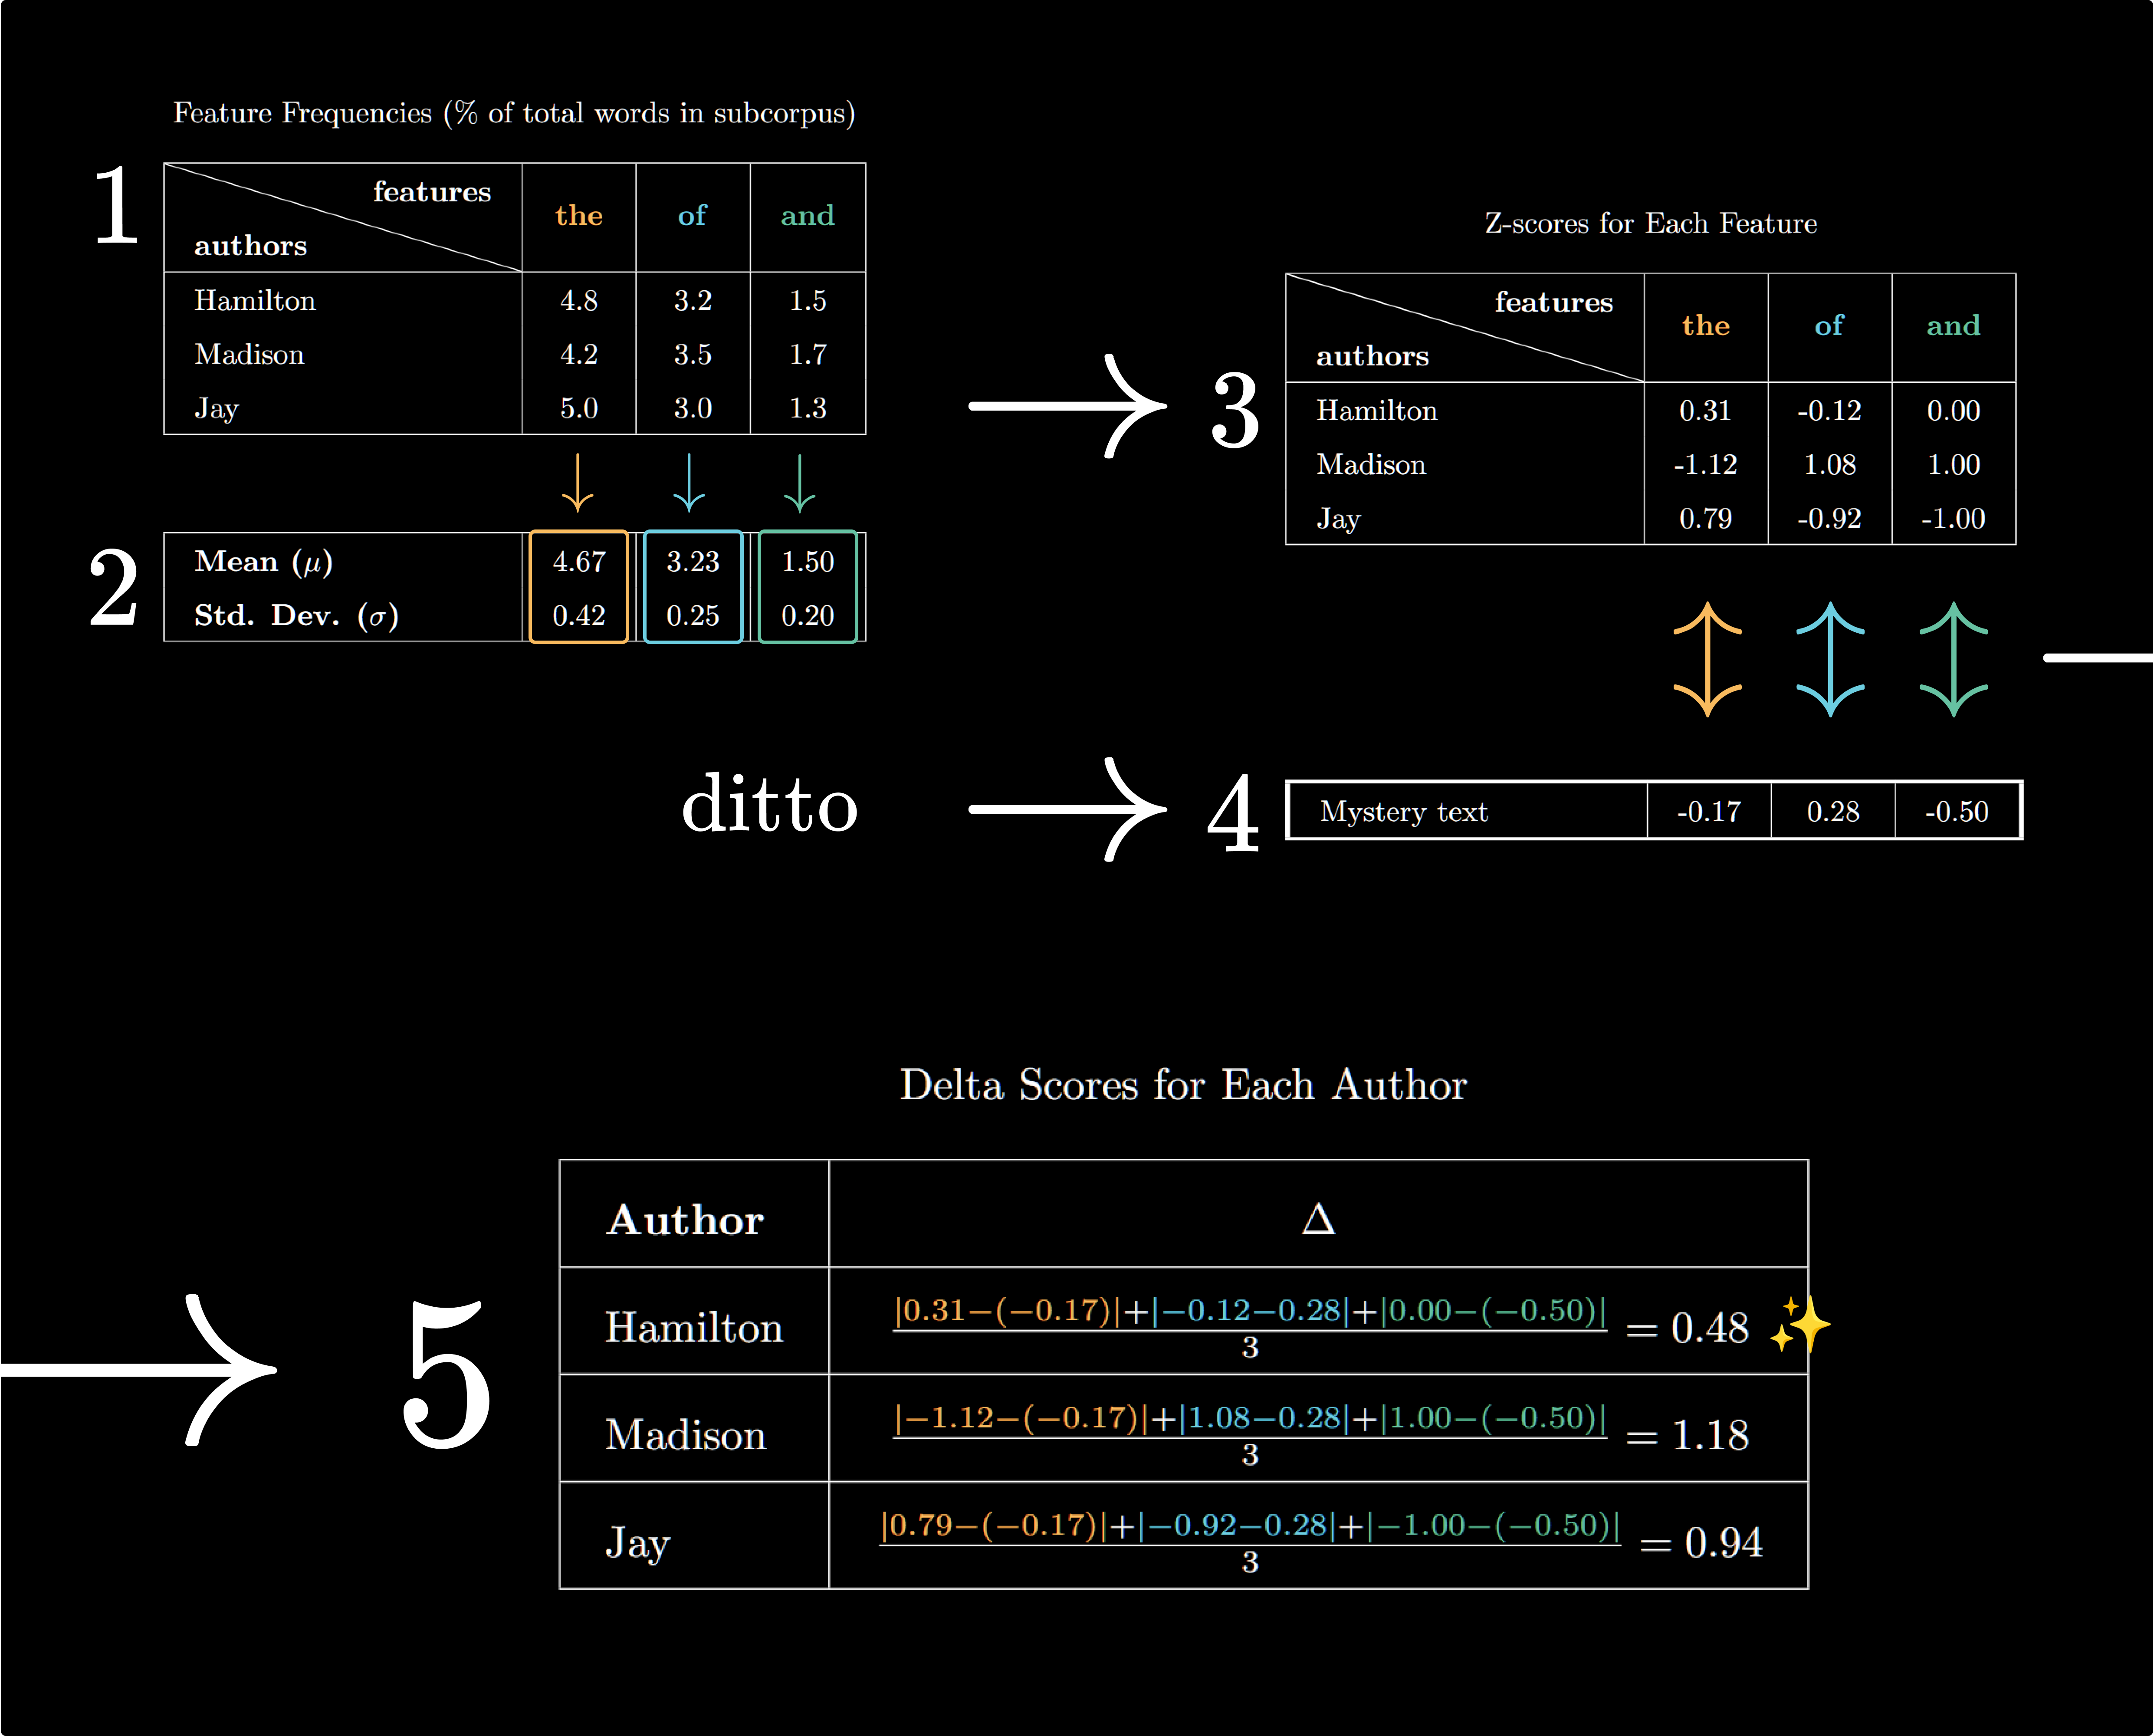

In [ ]:
from collections import Counter

authors = ("Hamilton", "Madison", "Jay", "Disputed", "Shared")
k = 30 # the most common k words used for comparison

# Merge all the authors words into a single list (joint_corpus)
def get_joint_authors_corpus(words_by_author):
    # Are the words in `words_by_author` already preprocessed properly to help with this task?
    # Which preprocessing techniques would be useful here?

    joint_corpus = []
    for author in authors:
        joint_corpus += words_by_author[author]

    return joint_corpus


joint_corpus = get_joint_authors_corpus(lowercased_words_by_author)
joint_corpus_freq_dist = Counter(joint_corpus)

most_common_features_freq_dist = joint_corpus_freq_dist.most_common(k)
print(most_common_features_freq_dist[:10])

[('the', 17841), ('of', 11796), ('to', 7017), ('and', 5015), ('in', 4414), ('a', 3967), ('be', 3769), ('that', 2747), ('it', 2518), ('is', 2176)]


In [ ]:
# Calculating features for each author's corpus
# How much does each of the most common features in the joint corpus represent as a
# percentage of the total words used by each author (returns a dictionary where each value is a dictionary (feature frequencies))
def getFeatureValuesByAuthor(authors, features):
    features_frequencies_by_author = {}

    for author in authors:
        features_frequencies_by_author[author] = {}
        words_by_author = lowercased_words_by_author[author]
        word_count_by_author = len(words_by_author)

        for feature in features:
            feature_count = words_by_author.count(feature)
            features_frequencies_by_author[author][feature] = feature_count / word_count_by_author

    return features_frequencies_by_author


features = [word for word, _ in most_common_features_freq_dist]
features_frequencies_by_author = getFeatureValuesByAuthor(authors, features)

print(features_frequencies_by_author['Madison'])

{'the': 0.10074236587668053, 'of': 0.05987397637694839, 'to': 0.03232225311870201, 'and': 0.029822189341564834, 'in': 0.020638281588816042, 'a': 0.01966886910380367, 'be': 0.019260695425903723, 'that': 0.013826883338860686, 'it': 0.012678894869767086, 'is': 0.012245210336998392, 'which': 0.01081660246434858, 'by': 0.011607438965279727, 'as': 0.009541059720911248, 'this': 0.006352202862317916, 'not': 0.007270593637592796, 'would': 0.004056225924130717, 'for': 0.006760376540217863, 'have': 0.006785887395086609, 'will': 0.006301181152580423, 'or': 0.005918518329549223, 'from': 0.005153192683486824, 'their': 0.005969540039286717, 'with': 0.00540830123217429, 'are': 0.005306257812699304, 'on': 0.007576723896017755, 'an': 0.0042092910533431975, 'they': 0.004693997295849384, 'states': 0.00625015944284293, 'government': 0.0058674966198117295, 'may': 0.0045664430215056505}


In [ ]:
import numpy as np

# TODO: Calculate feature average and standard deviation for each feature over all authors
# Tip: Use numpy to easily extract the mean and the standard deviation
def getMeanAndStandardDeviationForEachFeatureOverAllAuthors(authors, features, features_frequencies_by_author):
    corpus_features = {}

    for feature in features:
        # will hold 2 values (Mean and Standard Deviation(STD) for each feature)
        corpus_features[feature] = {"Mean": None, "STD": None}

        # Get the list of feature values over all attributes
        feature_frequency_over_all_authors = [features_frequencies_by_author[author][feature] for author in authors]

        # Extract and store Mean and Standard Deviation
        corpus_features[feature]["Mean"] = np.mean(feature_frequency_over_all_authors)
        corpus_features[feature]["STD"] = np.std(feature_frequency_over_all_authors)

    return corpus_features

corpus_features = getMeanAndStandardDeviationForEachFeatureOverAllAuthors(authors, features, features_frequencies_by_author)
print(corpus_features)

{'the': {'Mean': 0.09030600802658628, 'STD': 0.016613652753454826}, 'of': {'Mean': 0.05755430840059709, 'STD': 0.007188349981096428}, 'to': {'Mean': 0.03297005421074495, 'STD': 0.0042127159713033395}, 'and': {'Mean': 0.03305552950205726, 'STD': 0.009744780441597127}, 'in': {'Mean': 0.021269613302354235, 'STD': 0.002225700257308617}, 'a': {'Mean': 0.018049819055518744, 'STD': 0.00412392122904559}, 'be': {'Mean': 0.016936667276402823, 'STD': 0.006557197431815171}, 'that': {'Mean': 0.0134202547643632, 'STD': 0.0031622186967645394}, 'it': {'Mean': 0.013246365142922004, 'STD': 0.0024371055703114068}, 'is': {'Mean': 0.009835684630246413, 'STD': 0.0025023754727379072}, 'which': {'Mean': 0.009996630119785601, 'STD': 0.0017287359578576085}, 'by': {'Mean': 0.010356434381831602, 'STD': 0.002045479805575242}, 'as': {'Mean': 0.008882665261750702, 'STD': 0.001430407442718744}, 'this': {'Mean': 0.00638598381460456, 'STD': 0.0011870821305276099}, 'not': {'Mean': 0.006695050085963214, 'STD': 0.00212787

In [ ]:
# TODO: Calculate z-scores

# Next, we transform the observed feature frequencies in the five candidates’ subcorpora
# into z-scores describing how far away from the “corpus norm” these observations are.
# Nothing fancy here: we merely apply the definition of the z-score to each feature and store the results into yet another two-dimensional array.

def get_features_zscores_by_author(authors, features, features_frequencies_by_author, corpus_features):
    feature_zscores = {}

    for author in authors:
        feature_zscores[author] = {}

        for feature in features:
            # Z-score definition = (value - mean) / stddev
            feature_val = features_frequencies_by_author[author][feature]
            feature_mean = corpus_features[feature]["Mean"]
            feature_stdev = corpus_features[feature]["STD"]

            feature_zscores[author][feature] = ((feature_val - feature_mean) /
                                                feature_stdev)

    return feature_zscores

features_zscores_by_author = get_features_zscores_by_author(authors, features, features_frequencies_by_author, corpus_features)
print(features_zscores_by_author['Madison'])

{'the': 0.6281796065542541, 'of': 0.32269825237383437, 'to': -0.1537727908683388, 'and': -0.3318022586420113, 'in': -0.2836553176758931, 'a': 0.39259965415479725, 'be': 0.354424001056433, 'that': 0.12858964337714274, 'it': -0.23284599570399725, 'is': 0.9628953500394011, 'which': 0.47431901953329897, 'by': 0.6115946879741059, 'as': 0.46028455913872357, 'this': -0.028457131497404583, 'not': 0.2704781564367381, 'would': -0.5653301632048702, 'for': -0.08650624514590664, 'have': 1.0775324540651825, 'will': 0.06608216798675273, 'or': -0.31194214194908804, 'from': -1.1577870499964884, 'their': -0.6692986412612915, 'with': -0.7600748802534203, 'are': -0.11487343211603143, 'on': 0.8568241871172226, 'an': 0.40629978655648075, 'they': -0.42900610163546776, 'states': 1.5980734153837695, 'government': 0.6892441478140072, 'may': 0.6663730418328585}


In [ ]:
test_words = federalist_by_author['TestCase']
# print(test_words[:100])

    # Everything we did for the authors corpora needs to be done for the test case as well.
    # This means:
    # * tokenization
    # * preprocessing
    # * compute feature frequencies for test case
    # * computing z-scores (can be done in the same loop as the previous step)

def get_features_z_scores_for_test_paper(test_case_paper, features, corpus_features):
    # Tokenization and preprocessing
    doc_test_case = NLP(test_case_paper)
    doc_preprocessed_words = [token.text.lower() for token in doc_test_case if token.is_alpha] # Keep only lowercased strings

    # Compute feature frequecies and z-scores
    total_words_count_test_case = len(doc_preprocessed_words)
    feature_zscores = {}

    for feature in features:
        feature_count = doc_preprocessed_words.count(feature)
        feature_frequency = feature_count / total_words_count_test_case

        feature_mean = corpus_features[feature]["Mean"]
        feature_stdev = corpus_features[feature]["STD"]
        feature_zscores[feature] = (feature_frequency - feature_mean) / feature_stdev

    return feature_zscores


features_z_scores_test_paper = get_features_z_scores_for_test_paper(test_words, features, corpus_features)
print(features_z_scores_test_paper)

{'the': -0.859237905316531, 'of': -2.0309225313886605, 'to': 1.1466790325728762, 'and': 1.1481486750054, 'in': 0.6724668862242091, 'a': -1.0436946656134132, 'be': 1.1510815229459994, 'that': 2.004666980795517, 'it': -0.14762068954267923, 'is': -1.0123497291127563, 'which': -2.3039287157850086, 'by': 1.2369535741278948, 'as': 5.501867386035658, 'this': -1.399143211104894, 'not': 0.891037170130496, 'would': -0.9293466217051046, 'for': -1.2751999125337463, 'have': 2.617230730219477, 'will': 1.6580012078324318, 'or': -0.27911241522314234, 'from': -0.7016103510997277, 'their': 0.8587071169018461, 'with': -0.19658392837650057, 'are': 8.793839378299568, 'on': -0.050732091204684235, 'an': -0.9168406318033879, 'they': 4.769716158118247, 'states': -1.6160137094750857, 'government': -2.4180700291755928, 'may': 1.1143675624716367}


In [ ]:
# We compute the delta values.

import math
def compute_delta_by_author(authors, features_zscores_by_author, test_z_scores):
    delta_by_author = {}

    for author in authors:
        delta = 0

        for feature in features:
            delta += math.fabs((test_z_scores[feature] - features_zscores_by_author[author][feature]))

        delta /= len(features)
        delta_by_author[author] = delta

    return delta_by_author

delta_by_author = compute_delta_by_author(authors, features_zscores_by_author, features_z_scores_test_paper)
print(delta_by_author)

{'Hamilton': 1.988081618757172, 'Madison': 1.818528517652368, 'Jay': 1.7193121428776608, 'Disputed': 1.7344193339638312, 'Shared': 2.089738937363899}


### Exercitiu 4: Clustering

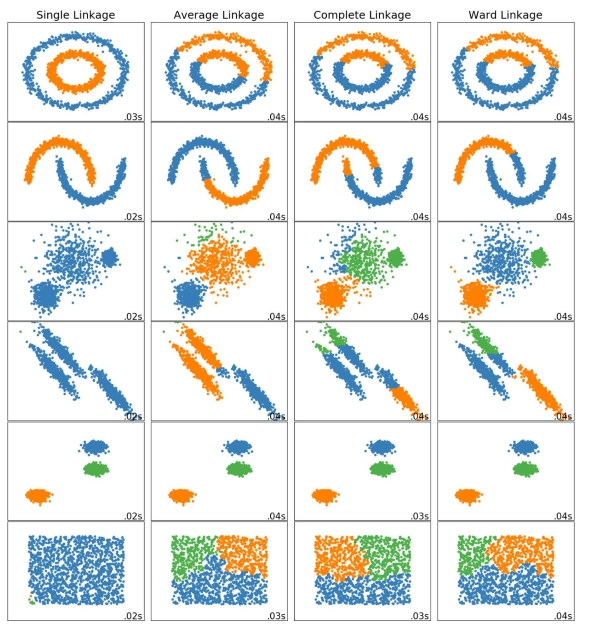


1. acum vom aplica modelul spaCy **peste fiecare articol in parte**, nu peste intregul set de articole de la un autor
1. scrieti o functie care construieste un vector de caracteristici pentru un text; caracteristicile pot fi:
  - frecventele cuvintelor functionale din [articolul original](//ptrckprry.com/course/ssd/reading/Most63.pdf), pg. 25;
  - lungimea medie a propozitiilor;
  - numarul de entitati numite (named entities);
  - lungimea medie a cuvintelor;
  - numarul de adjective;
  - numarul de semne de punctuatie.

  **atentie**: numerele trebuie normalizate astfel incat doua texte de lungimi diferite sa fie comparabile!
1. aplicati functia de extractie a caracteristicilor pe toate textele
1. folosind o metoda de [clustering aglomerativ](//www.youtube.com/watch?v=1jW9xlEtQao), afisati dendrograma (arborele) corespunzator pentru datele voastre prin [metoda Ward](//youtu.be/vg1w5ZUF5lA?feature=shared&t=448); vedeti tutorialul [aici](//scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py)


In [ ]:
# definim o functie care compileaza toate fisierele de la un autor intr-o lista de stringuri

def read_files_into_strings(filenames):
    strings = []
    for filename in filenames:
        with open(f'data/federalist_{filename}.txt', 'r') as f:
            strings.append(f.read())
    return strings

federalist_by_author = {}
for author, files in papers.items():
    federalist_by_author[author] = read_files_into_strings(files)

In [ ]:
federalist_by_author['Madison'][0]

' 10\n\nThe Same Subject Continued (The Union as a Safeguard Against Domestic\nFaction and Insurrection)\n\nFrom the Daily Advertiser. Thursday, November 22, 1787.\n\nMADISON\n\nTo the People of the State of New York:\n\nAMONG the numerous advantages promised by a well constructed Union, none\ndeserves to be more accurately developed than its tendency to break and\ncontrol the violence of faction. The friend of popular governments never\nfinds himself so much alarmed for their character and fate, as when he\ncontemplates their propensity to this dangerous vice. He will not fail,\ntherefore, to set a due value on any plan which, without violating the\nprinciples to which he is attached, provides a proper cure for it.\nThe instability, injustice, and confusion introduced into the public\ncouncils, have, in truth, been the mortal diseases under which popular\ngovernments have everywhere perished; as they continue to be the\nfavorite and fruitful topics from which the adversaries to libert

In [ ]:
# preferam batching - metoda NLP.pipe() - in loc de aplicat NLP() pe fiecare text din motive de performanta

import timeit

start = timeit.default_timer()

for document in NLP.pipe(federalist_by_author['Hamilton'], batch_size=20):
  print(len(document), end=' ')

stop = timeit.default_timer()
print(f"\nau trecut {stop-start:.2f}s\n")

start = timeit.default_timer()

for document in federalist_by_author['Hamilton']:
  document = NLP(document)
  print(len(document), end=' ')

stop = timeit.default_timer()
print(f"\nau trecut {stop-start:.2f}s")


In [ ]:
# TODO: proceseaza documentele din federalist_by_author aplicand batching

# sugestie: poti folosi defaultdict

from collections import defaultdict

autor2spacy = defaultdict(list)

for autor, texte in federalist_by_author.items():
  for document in NLP.pipe(texte, batch_size=10):
    autor2spacy[autor].append(document)

In [ ]:
autor2spacy['Madison'][0][:100]

 10

The Same Subject Continued (The Union as a Safeguard Against Domestic
Faction and Insurrection)

From the Daily Advertiser. Thursday, November 22, 1787.

MADISON

To the People of the State of New York:

AMONG the numerous advantages promised by a well constructed Union, none
deserves to be more accurately developed than its tendency to break and
control the violence of faction. The friend of popular governments never
finds himself so much alarmed for their character and fate, as when he

In [ ]:
# cuvintele folosite de Mosteller & Wallace (1963)

CUVINTE_DIN_ARTICOL = ['according', 'also', 'although', 'always', 'an', 'apt', 'both', 'by', 'commonly',
                       'consequently', 'considerable', 'considerably', 'direction', 'enough', 'innovation',
                       'innovations', 'kind', 'language', 'matter', 'matters', 'of', 'on', 'particularly',
                       'probability', 'there', 'this', 'though', 'to', 'upon', 'vigor', 'vigorous', 'while',
                       'whilst', 'work', 'works']


In [ ]:
# TODO: defineste o functie care calculeaza frecventele cuvintelor functionale de mai sus
# nu uita sa normalizezi!

import numpy as np
from collections import Counter

def count_function_words(document):
  contor = Counter()
  num_alpha = 0

  for token in document:
    if token.is_alpha:
      num_alpha += 1
    if token.text.lower() in CUVINTE_DIN_ARTICOL:
      contor[token.text.lower()] += 1

  rezultat = np.zeros(len(CUVINTE_DIN_ARTICOL))

  for idx, cuvant in enumerate(CUVINTE_DIN_ARTICOL):
    rezultat[idx] = contor[cuvant]

  return rezultat / num_alpha

In [ ]:
print(count_function_words(autor2spacy['Madison'][0]))

[0.0009901  0.         0.         0.00066007 0.00462046 0.00033003
 0.00165017 0.01287129 0.         0.00033003 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.05181518 0.00594059 0.00033003 0.00033003
 0.0019802  0.00363036 0.         0.0330033  0.         0.
 0.         0.         0.         0.         0.        ]


In [ ]:
# TODO: o functie care returneaza lungimea medie a propozitiilor

def medium_sent_length(document):
  return np.mean([len(sentence) for sentence in document.sents])

In [ ]:
# TODO: o functie care returneaza numarul de entitati cu nume

def count_named_entities(document):
  return len(document.ents) / doc.count_by(spacy.attrs.IS_ALPHA)[1]

In [ ]:
# TODO: o functie care returneaza lungimea medie a cuvintelor

def average_word_length(document):
  return np.mean([len(token.text) for token in document if token.is_alpha])

In [ ]:
# TODO: o functie care returneaza numarul de adjective

def count_adjectives(document):
  return len([token for token in document if token.pos_ == 'ADJ']) / doc.count_by(spacy.attrs.IS_ALPHA)[1]

In [ ]:
# TODO: o functie care returneaza numarul de semne de punctuatie

def count_punctuation(document):
  return len([token for token in document if token.pos_ == 'PUNCT']) / doc.count_by(spacy.attrs.IS_ALPHA)[1]

In [ ]:
X = []
labels = []
for autor in ["Madison", "Hamilton", "Disputed","Jay", "TestCase"]:
  for document in autor2spacy[autor]:
    X.append(count_function_words(document))
    labels.append(autor)

X = np.array(X)


In [ ]:
X = []
labels = []
for autor in ["Madison", "Hamilton", "Disputed"]:
  for document in autor2spacy[autor]:
    X.append(medium_sent_length(document))
    labels.append(autor)

X = np.array(X)

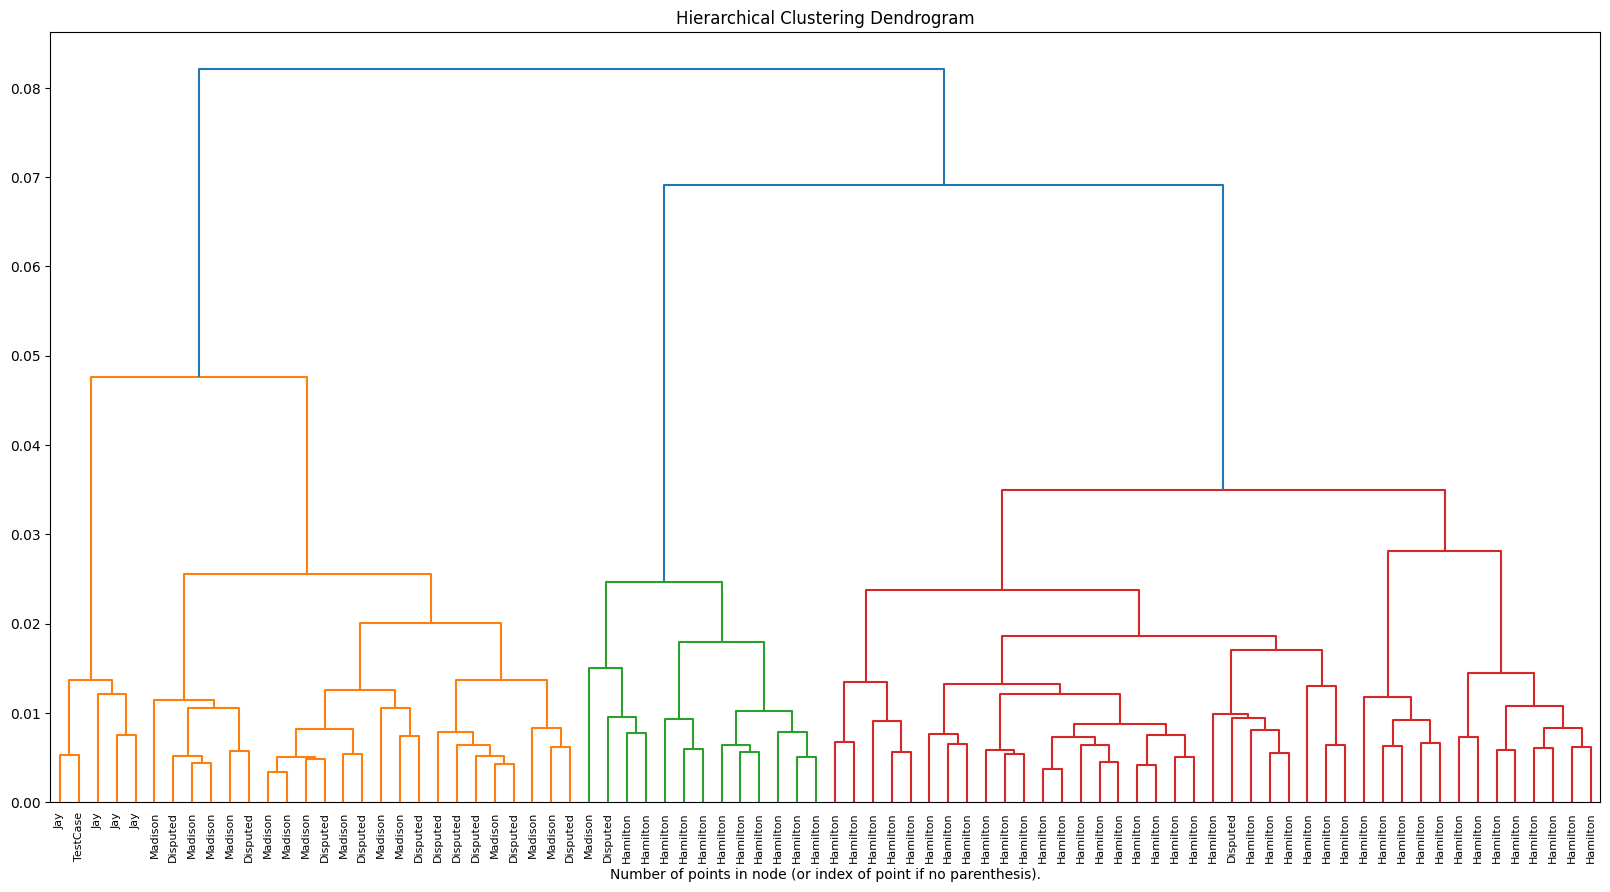

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram

# Create an instance of AgglomerativeClustering
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

# Fit the model to your data
model.fit(X)

# Function to plot the dendrogram
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)


    dendrogram(linkage_matrix, **kwargs)

plt.figure(figsize=(20, 10))
plot_dendrogram(model, labels=labels, leaf_rotation=90, leaf_font_size=8)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

In [ ]:
corpus = sum(federalist_by_author.values(), [])

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42, n_init="auto").fit(X)
print(kmeans.labels_)

true_labels = [i for i, paper_list in enumerate(papers.values()) for _ in paper_list]
true_labels[-1] = 2
print(true_labels)

[1 0 1 1 1 1 2 1 2 1 1 1 1 0 0 0 1 0 0 1 0 0 1 0 0 0 2 0 0 0 1 0 0 1 0 0 0
 0 0 0 1 0 1 0 1 1 0 0 2 2 0 0 1 0 1 0 0 2 0 1 2 0 2 2 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 1 1 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2]


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(corpus)

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42, n_init="auto").fit(X)
print(kmeans.labels_)

print(true_labels)


[2 2 0 2 2 2 2 2 2 2 2 2 2 2 0 0 2 0 2 0 0 0 0 0 2 2 2 2 2 0 2 0 0 0 0 0 2
 2 2 1 0 2 1 1 2 2 2 1 2 2 2 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 2 2 2 1
 2 1 1 1 1 1 1 1 2 2 2]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2]


## Resurse

- postarea din care e inspirat laboratorul [aici](//programminghistorian.org/en/lessons/introduction-to-stylometry-with-python)
- un tutorial interactiv dragut spaCy [aici](//course.spacy.io/en/chapter1/)